In [22]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
sys.path.append('..')
from os.path import join
from matplotlib import pyplot as plt
from collections import defaultdict
import pandas as pd
import os
import seaborn as sns
from tqdm import tqdm
import dvu
import viz
dvu.set_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# note: current best results are in oct17
save_dir = '/home/chansingh/mntv1/deep-fMRI/results/linear_models/oct25'
# save_dir = '/home/chansingh/mntv1/deep-fMRI/results/linear_models/subsamp_oct17'
dfs = []
fnames = [
    fname for fname in os.listdir(save_dir)[::-1]
    if not fname.startswith('coef')
]
for fname in tqdm(fnames):
    df = pd.read_pickle(join(save_dir, fname))
    # print(fname)
    # display(df)
    dfs.append(df.reset_index())
d = pd.concat(dfs)
# d = d.drop(columns='coef_')
# .round(2)
# d.set_index(['feats', 'dset'], inplace=True)
d

**CV over perc_threshold_fmri**

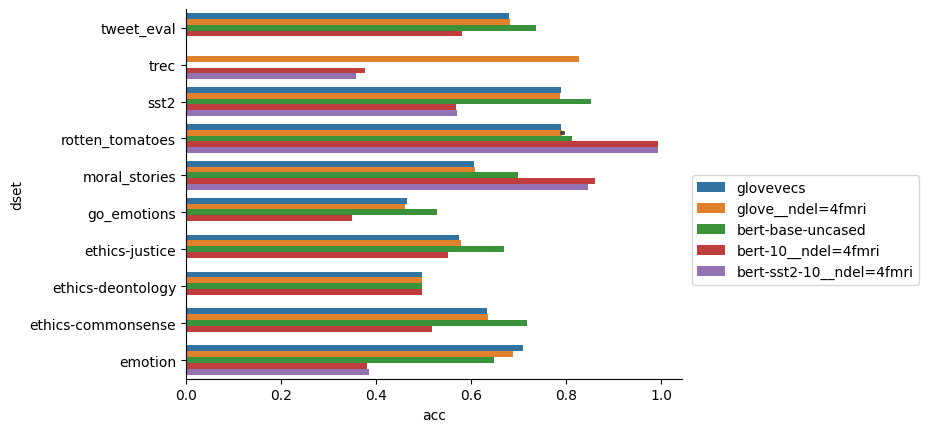

In [39]:
# note, if sweeping over more params need to include them in the groupby
groupby = ['model', 'dset', 'seed']
idxs = d.groupby(['model','dset'])['acc_cv'].transform(max) == d['acc_cv']#.mean().round(2)
dt = d[idxs]

sns.barplot(data=dt, y='dset', x='acc', hue='model', orient='h')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()

**Head-to-head comparison**

In [ ]:
dsets = ['rotten_tomatoes', 'moral_stories', 'sst2', 'tweet_eval']
dh = dt[dt.dset.isin(dsets)]
dh = dh[dh.model.isin(['bert-base-uncased', 'bert-10__ndel=4fmri'])]
dh['legend'] = dh['model'].map({
    'bert-base-uncased': 'BERT (Finetuned)',
    'bert-10__ndel=4fmri': 'BERT+fMRI (Finetuned)',
})
dh['dset_clean'] = dh['dset'].map(viz.DSETS_RENAME)

plt.figure(figsize=(6, 4), dpi=300)
sns.barplot(data=dh, y='dset_clean', x='acc', hue='legend', orient='h',
            hue_order=['BERT (Finetuned)', 'BERT+fMRI (Finetuned)'], palette=['gray', '#ff6141'])
plt.xlabel('Accuracy')
plt.ylabel('Dataset')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()


**Look over all hyperparams**

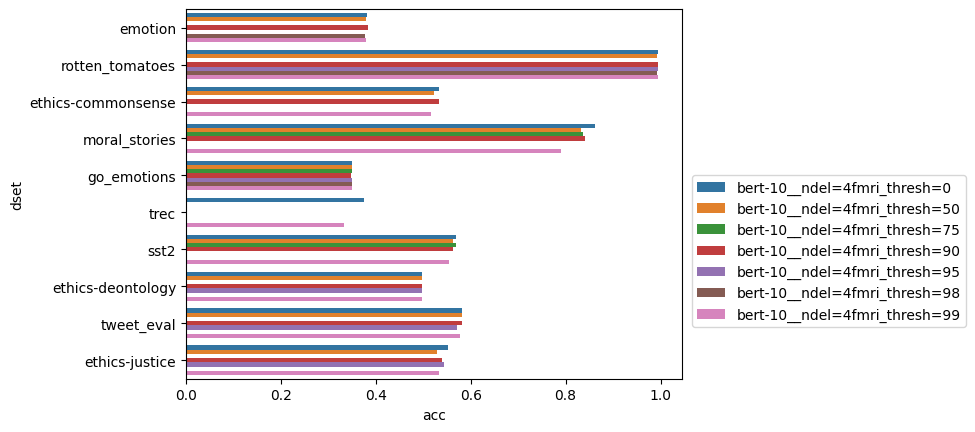

In [7]:
idxs = d['model'].isin([
    # 'glove__ndel=4fmri',
    'bert-10__ndel=4fmri'
])
dperc = d[idxs]
dperc['model_full'] = dperc['model'] + '_thresh=' + dperc['perc_threshold_fmri'].astype(str)
dperc = dperc.sort_values(by='perc_threshold_fmri')

# sns.barplot(data=d, x='dset', y='acc', hue='feats')
sns.barplot(data=dperc, y='dset', x='acc', hue='model_full', orient='h')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
# plt.savefig('decoding_accs.pdf', bbox_inches='tight')
plt.show()